In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the CPU Usage of Broker-1
df1b = pd.read_csv("Brok1cpu_usage.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-07-30 23:53:55,308.054581,my-cluster-metrics-kafka-0
1,2021-07-30 23:54:09,311.475172,my-cluster-metrics-kafka-0
2,2021-07-30 23:54:22,312.105724,my-cluster-metrics-kafka-0


In [5]:
#Average CPU Usage before rebalancing
cpubr1 = df1b[(df1b['timestamp'] >= '2021-07-30 23:53:55') & (df1b['timestamp'] <= '2021-07-31 00:21:59')]
cpubr1.head(3)
cpubr1avg = cpubr1['values'].mean()
print(cpubr1avg)
cpubr1.describe()

436.0438193086207


,values
count,116.000000
mean,436.043819
std,78.046277
min,308.054581
25%,367.146466
50%,432.714567
75%,500.022733
max,573.602121


In [6]:
#Average CPU Usage During rebalancing
cpudr1 = df1b[(df1b['timestamp'] >= '2021-07-31 00:22:14') & (df1b['timestamp'] <= '2021-07-31 00:25:08')]
cpudr1.head(3)
cpudr1avg = cpudr1['values'].mean()
print(cpudr1avg)
cpudr1.describe()

594.338859475


,values
count,12.000000
mean,594.338859
std,12.288779
min,576.230416
25%,584.965617
50%,593.914194
75%,603.090429
max,613.501355


In [7]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1cpu = ttest_ind(cpudr1['values'], cpubr1['values'])
print(resb1cpu)

Ttest_indResult(statistic=6.992810618976633, pvalue=1.402711324727952e-10)


In [8]:
cpubr1.drop(['pod'], axis=1, inplace=True)
cpubr1.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  116 non-null    datetime64[ns]
 1   values     116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
cpudr1.drop(['pod'], axis=1, inplace=True)
cpudr1.head(10)
cpudr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 116 to 127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12 non-null     datetime64[ns]
 1   values     12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


Text(0.5, 1.0, 'Broker1 CPU Usage')

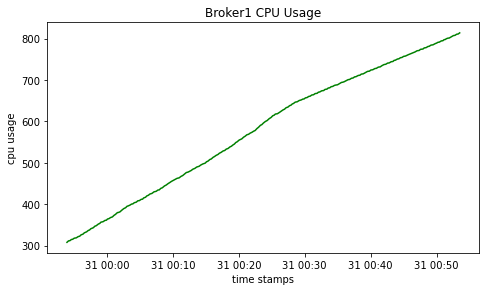

In [10]:
from datetime import datetime
#CPU Usage for the entire load test
c1=[]
for dat in df1b.timestamp:
    # print (dat)
    c1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(c1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('cpu usage')
axe1.set_title('Broker1 CPU Usage')
#fig1.tight_layout()

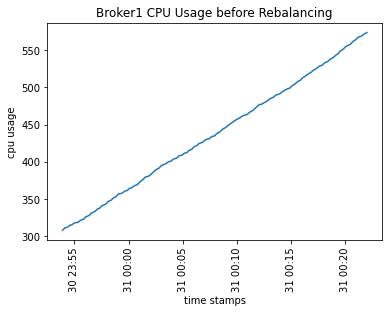

In [11]:
#CPU Usage before rebalancing
b1=[]
for dat in cpubr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,cpubr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage before Rebalancing')
plt.show()

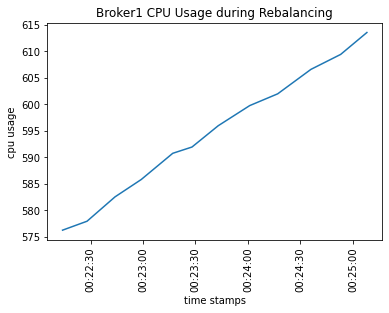

In [12]:
#CPU Usage during rebalancing
d1=[]
for dat in cpudr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,cpudr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage during Rebalancing')
plt.show()

In [17]:
# DA on the CPU Usage of Broker-2
df2b = pd.read_csv("Brok2cpu_usage.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-07-30 23:54:39,318.929664,my-cluster-metrics-kafka-1
1,2021-07-30 23:54:52,319.749203,my-cluster-metrics-kafka-1
2,2021-07-30 23:55:08,322.713456,my-cluster-metrics-kafka-1


In [18]:
#Average CPU Usage before rebalancing
cpubr2 = df2b[(df1b['timestamp'] >= '2021-07-30 23:54:39') & (df2b['timestamp'] <= '2021-07-31 00:22:06')]
cpubr2.head(3)
cpubr2avg = cpubr2['values'].mean()
print(cpubr2avg)
cpubr2.describe()

459.5096904824074


,values
count,108.000000
mean,459.509690
std,77.291274
min,326.453604
25%,393.367171
50%,460.822388
75%,522.825478
max,591.800830


In [19]:
#Average CPU Usage During rebalancing
cpudr2 = df2b[(df2b['timestamp'] >= '2021-07-31 00:22:17') & (df2b['timestamp'] <= '2021-07-31 00:25:30')]
cpudr2.head(3)
cpudr2avg = cpudr2['values'].mean()
print(cpudr2avg)
cpudr2.describe()

615.995713707143


,values
count,14.000000
mean,615.995714
std,14.657183
min,593.106889
25%,603.297855
50%,616.832575
75%,627.642038
max,637.090475


In [20]:
#T-Stats Analysis
resb2cpu = ttest_ind(cpudr2['values'], cpubr2['values'])
print(resb2cpu)

Ttest_indResult(statistic=7.531701744801787, pvalue=1.0321385335445745e-11)


In [21]:
cpubr2.drop(['pod'], axis=1, inplace=True)
cpubr2.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  116 non-null    datetime64[ns]
 1   values     116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
cpudr2.drop(['pod'], axis=1, inplace=True)
cpudr2.head(10)
cpudr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 112 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14 non-null     datetime64[ns]
 1   values     14 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


Text(0.5, 1.0, 'Broker2 CPU Usage')

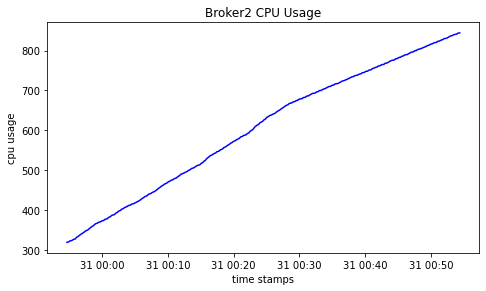

In [23]:
from datetime import datetime
#CPU Usage for the entire load test
c2=[]
for dat in df2b.timestamp:
    # print (dat)
    c2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(c2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('cpu usage')
axe2.set_title('Broker2 CPU Usage')
#fig1.tight_layout()

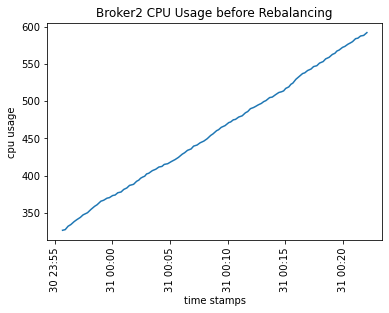

In [24]:
#CPU Usage before rebalancing
b2=[]
for dat in cpubr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,cpubr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage before Rebalancing')
plt.show()

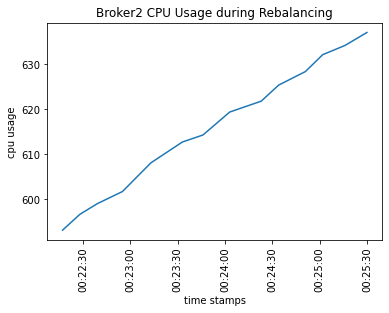

In [25]:
#CPU Usage during rebalancing
d2=[]
for dat in cpudr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,cpudr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage during Rebalancing')
plt.show()

In [30]:
# DA on the CPU Usage of Broker-3
df3b = pd.read_csv("Brok3cpu_usage.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-07-30 23:55:27,325.653674,my-cluster-metrics-kafka-2
1,2021-07-30 23:55:47,328.898531,my-cluster-metrics-kafka-2
2,2021-07-30 23:55:59,329.834462,my-cluster-metrics-kafka-2


In [31]:
#Average CPU Usage before rebalancing
cpubr3 = df3b[(df3b['timestamp'] >= '2021-07-30 23:55:27') & (df3b['timestamp'] <= '2021-07-31 00:22:04')]
cpubr3.head(3)
cpubr3avg = cpubr3['values'].mean()
print(cpubr3avg)
cpubr3.describe()

452.937387147619


,values
count,105.000000
mean,452.937387
std,73.753072
min,325.653674
25%,389.666488
50%,451.652343
75%,514.642366
max,579.703534


In [32]:
#Average CPU Usage During rebalancing
cpudr3 = df3b[(df3b['timestamp'] >= '2021-07-31 00:22:23') & (df3b['timestamp'] <= '2021-07-31 00:25:06')]
cpudr3.head(3)
cpudr3avg = cpudr3['values'].mean()
print(cpudr3avg)
cpudr3.describe()

605.2991197692307


,values
count,13.000000
mean,605.299120
std,14.740334
min,583.122122
25%,594.150361
50%,605.497419
75%,616.496237
max,627.178780


In [33]:
#T-Stats Analysis
resb3cpu = ttest_ind(cpudr3['values'], cpubr3['values'])
print(resb1cpu)

Ttest_indResult(statistic=6.992810618976633, pvalue=1.402711324727952e-10)


In [34]:
cpubr3.drop(['pod'], axis=1, inplace=True)
cpubr3.head(10)
cpubr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  105 non-null    datetime64[ns]
 1   values     105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
cpudr3.drop(['pod'], axis=1, inplace=True)
cpudr3.head(10)
cpudr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 105 to 117
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  13 non-null     datetime64[ns]
 1   values     13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 312.0 bytes


Text(0.5, 1.0, 'Broker3 CPU Usage')

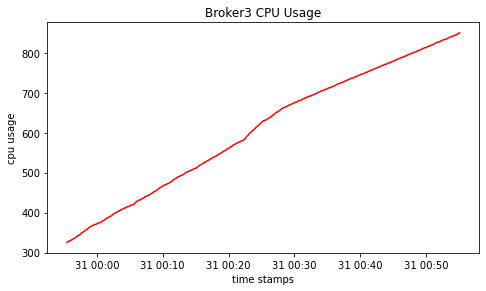

In [36]:
from datetime import datetime
#CPU Usage for the entire load test
c3=[]
for dat in df3b.timestamp:
    # print (dat)
    c3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(c3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('cpu usage')
axe3.set_title('Broker3 CPU Usage')
#fig1.tight_layout()

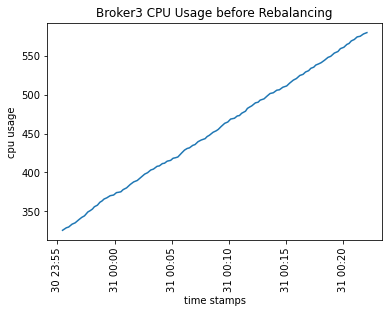

In [37]:
#CPU Usage before rebalancing
b3=[]
for dat in cpubr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,cpubr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage before Rebalancing')
plt.show()

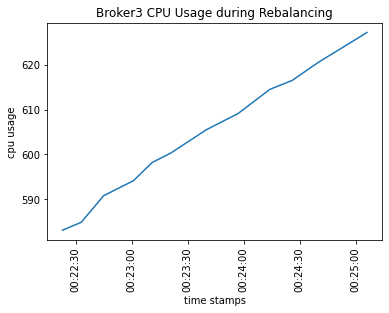

In [38]:
#CPU Usage during rebalancing
d3=[]
for dat in cpudr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,cpudr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage during Rebalancing')
plt.show()